In [1]:
from maelzel.core import *

Chain([4C:gliss=True, 4A+, Rest:1♩])
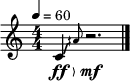

In [2]:
n = Note(60, dynamic='ff', gliss=True)
m = Note("4A+!", dur=0)
o = Rest(1, dynamic='mf')
ch = Chain([n, m, o])
ch.addSpanner('>')
ch

Chain([4C:1♩, 4D:0.5♩, 4E])
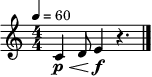

In [3]:
chain = Chain([
    Note("4C", 1, dynamic='p').addSpanner("<"),
    Note("4D", 0.5),
    Note("4E", dynamic='f')   # This ends the hairpin spanner
])
chain

Chain([4C:1.33♩, 4D:0.5♩, 4E, 4F:0.5♩])
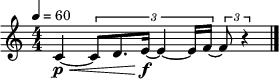

In [2]:
chain = Chain([
    Note("4C", 1+F(1, 3), dynamic='p').addSpanner("<"),
    Note("4D", 0.5).addSpanner("slur"),
    Note("4E", dynamic='f').addSpanner('~slur'),   # This ends the hairpin spanner
    Note("4F", 0.5),
])
chain

In [5]:
a = makeNote(60, 1, dynamic='f')
r = makeRest(1, dynamic='p')

In [6]:
p = Part([a,r])

In [7]:
qp = quant.quantizePart(p, struct=ScoreStruct(timesig='4/4'), profile=quant.makeQuantizationProfile('high'))
qp

QuantizedPart(struct=ScoreStruct(tempo=60, timesig=(4, 4)), measures=[QuantizedMeasure(timesig=(4, 4), quarterTempo=60, beats=[QuantizedBeat(divisions=(1,), assignedSlots=[0], notations=[«0.000:1.000 4C f»], beatDuration=Fraction(1, 1), beatOffset=Fraction(0, 1), quantizationError=0.002, quantizationInfo=''), QuantizedBeat(divisions=(1,), assignedSlots=[0], notations=[«1.000:2.000 rest p»], beatDuration=Fraction(1, 1), beatOffset=Fraction(1, 1), quantizationError=0, quantizationInfo=''), QuantizedBeat(divisions=(1,), assignedSlots=[0], notations=[«2.000:3.000 rest»], beatDuration=Fraction(1, 1), beatOffset=Fraction(2, 1), quantizationError=0, quantizationInfo=''), QuantizedBeat(divisions=(1,), assignedSlots=[0], notations=[«3.000:4.000 rest»], beatDuration=Fraction(1, 1), beatOffset=Fraction(3, 1), quantizationError=0, quantizationInfo='')], profile=high)], name='', shortname='')


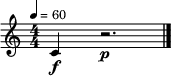

In [8]:
options = render.RenderOptions()
score = quant.QuantizedScore([qp])
r = render.renderQuantizedScore(score, options)
r.write('~/tmp/quant.ly')
r